# Lab 6

## Exercise 5.12: The Stefan-Boltzmann Constant

Part a)

\begin{equation*}
I(\omega) = \frac{\hbar}{4\pi^2c^2} \frac{\omega}{e^k{\frac{\hbar\omega}{k_BT}}}
\end{equation*}

\begin{equation*}
W =\int_{0}^{\infty} \frac{\hbar}{4\pi^2c^2} \frac{\omega}{e^k{\frac{\hbar\omega}{k_BT}}}d\omega
\end{equation*}

\begin{equation*}
x = \frac{\hbar\omega}{k_BT}
\end{equation*}

\begin{equation*}
dx = \frac{\hbar d\omega}{k_BT} \space \space d\omega = \frac{k_BTdx}{\hbar}
\end{equation*}

\begin{equation*}
W =\int_{0}^{\infty} \frac{\hbar}{4\pi^2c^2} \frac{(\frac{xk_bT}{\hbar})^3}{e^x}\frac{k_BT}{\hbar}dx
\end{equation*}

\begin{equation*}
W =\frac{k_b^4T^4}{4\pi^2c^2\hbar^3}\int_{0}^{\infty}\frac{x^3}{e^x}dx
\end{equation*}


Part b)

In [62]:
%matplotlib inline
from scipy import integrate
import math
import cmath
import numpy as np
import pylab as plt

In [63]:
kB = 1.38064852 * 10**-23 # Units: m^2 kg s^-2 K^-1
T = 5800 # Units: K
c = 3 * 10**8 # Units: m/s
hBar = 1.054571800 * 10**-34 # Units: J*s
a = 0
b = np.inf

def integrand (x):
    return (math.exp(-x) * x*x*x) / (1 - math.exp(-x))

integral, error = integrate.quad(integrand, a, b)

W = ((kB**4 * T**4) / (4 * math.pi**2 * c**2 * hBar**3)) * integral
WErr = ((kB**4 * T**4) / (4 * math.pi**2 * c**2 * hBar**3)) * error

print("W = ", W)
print("Error = ", WErr)

W =  64079929.48307855
Error =  0.025936838918349095


Part c)

In [14]:
rho = W / T**4
rhoAccepted = 5.67 * 10**-8 # W/m^2K^-4

print("Calculated value: ", rho)
print("Actual value: ", rhoAccepted)

Calculated value:  5.662523937010056e-08
Actual value:  5.67e-08


## Exercise 5.19: Diffraction Gratings

Part a)

\begin{equation*}
u_z = \frac{n\pi}{\alpha}
\end{equation*}

Part b)

In [97]:
alpha = math.pi / 20e-6 # Units: meters^-1

def q (u):
    return (math.sin(alpha * u))**2

Part c)

In [107]:
lmda = 500e-9 # Units: m
f = 1 # Units: m
wScreen = 0.1 # Units: m
wGrating = 200e-6
N = 100
   
def I1 (x):
    
    def integrand2 (u1):
        return math.sqrt(q(u1)) * cmath.exp((1j * 2 * math.pi * x * u1) / (lmda * f))
    
    def simpson (func, numSteps, x1, x2):
        h = (x2 - x1) / numSteps
        sum = func (x1) + func (x2)

        for i in range (int (numSteps / 2)):
            sum += 4 * func (x1 + (2 * i - 1) * h) #odd terms
            sum += 2 * func (x1 + 2 * i * h) #even terms
            
        return sum * h / 3

    integral = simpson(integrand2, N, -wGrating/2, wGrating/2)
    intensity = abs(integral)**2
    
    return intensity

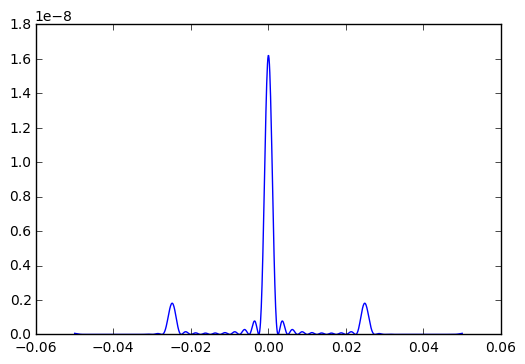

In [108]:
steps = 1000
xValues = np.linspace (-0.05, 0.05, steps)
brightness = []

for i in xValues:
    brightness.append(I1 (i))

plt.plot(xValues, brightness)
plt.show()